In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
plt.style.use('ggplot')
%matplotlib inline

In [8]:
# Load the Spotify dataset
try:
    spotify_df = pd.read_csv('C:/Users/keega/OneDrive/Documents/Spotifydata.csv')  # Update with your actual filename
    print("Data loaded successfully! Shape:", spotify_df.shape)
    # Check column names and look for month column or similar
    print("Column Names:", spotify_df.columns)
except FileNotFoundError:
    print("Error: File not found. Please check the filename and path.")
    # Create empty dataframe for demonstration
    spotify_df = pd.DataFrame(columns=['title', 'artist', 'top genre', 'year', 'duration', 'month'])

# Display first few rows if data loaded successfully
if not spotify_df.empty:
    display(spotify_df.head())

Data loaded successfully! Shape: (1000, 17)
Column Names: Index(['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
       'artist type'],
      dtype='object')


,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2/17/2022,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2/17/2022,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2/17/2022,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2/17/2022,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2/17/2022,104,85,69,-6,9,74,268,39,5,79,2010,Solo


In [9]:
# Convert 'added' to datetime and extract month/year
spotify_df['added'] = pd.to_datetime(spotify_df['added'])
spotify_df['added_month'] = spotify_df['added'].dt.month_name()
spotify_df['added_year'] = spotify_df['added'].dt.year

# 1. Number of files submitted for the month of March

In [10]:
march_count = spotify_df[spotify_df['added_month'].str.lower() == 'march'].shape[0]
print(f"1. Number of songs added in March: {march_count}")

1. Number of songs added in March: 3


# 2. Maximum duration for each year (using 'year released' and 'dur')


2. Maximum duration by release year:


,year released,dur
0,1975,354
1,2009,321
2,2010,308
3,2011,337
4,2012,350
5,2013,688
6,2014,323
7,2015,296
8,2016,348
9,2017,343


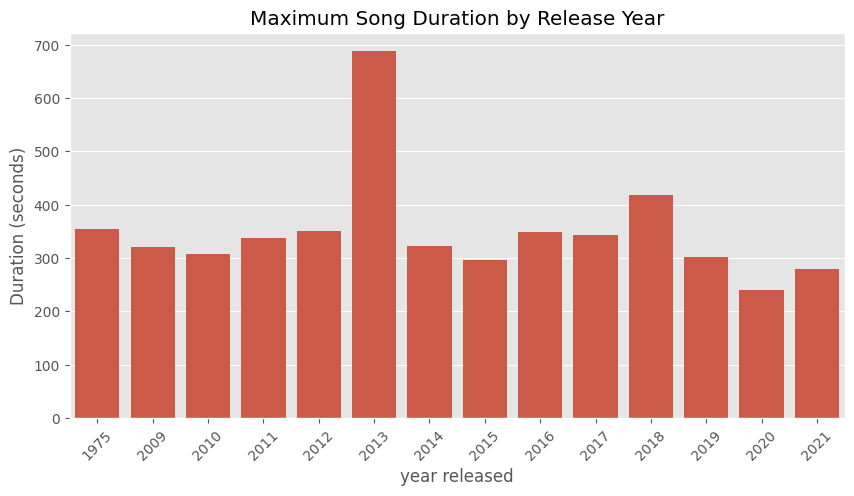

In [11]:
max_duration = spotify_df.groupby('year released')['dur'].max().reset_index()
print("\n2. Maximum duration by release year:")
display(max_duration)

# Visualization
plt.figure(figsize=(10,5))
sns.barplot(x='year released', y='dur', data=max_duration)
plt.title('Maximum Song Duration by Release Year')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45)
plt.show()

# 3. Number of songs per artist (all years)


3. Number of songs per artist (all years):


,Artist,Song Count
0,Taylor Swift,21
1,Calvin Harris,18
2,Drake,18
3,Rihanna,14
4,Ariana Grande,14
5,Bruno Mars,13
6,Maroon 5,11
7,Jason Derulo,10
8,Ed Sheeran,10
9,Post Malone,10


<Figure size 1200x600 with 0 Axes>

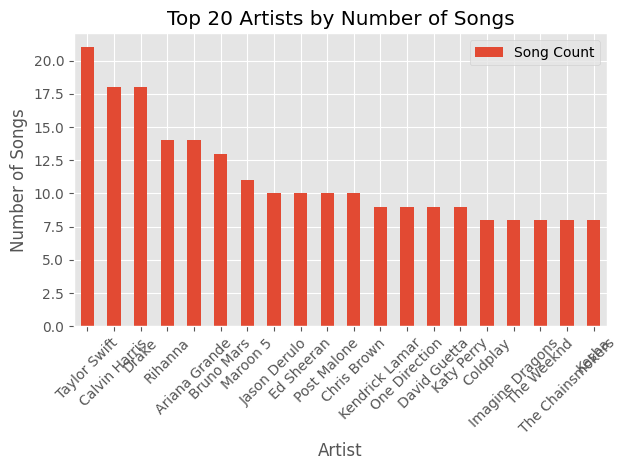

In [12]:
songs_per_artist = spotify_df['artist'].value_counts().reset_index()
songs_per_artist.columns = ['Artist', 'Song Count']
print("\n3. Number of songs per artist (all years):")
display(songs_per_artist.head(10))

# Top 20 artists visualization
plt.figure(figsize=(12,6))
songs_per_artist.head(20).plot(kind='bar', x='Artist', y='Song Count')
plt.title('Top 20 Artists by Number of Songs')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Number of songs per artist in 2010

In [13]:
songs_2010 = spotify_df[spotify_df['year released'] == 2010]['artist'].value_counts().reset_index()
songs_2010.columns = ['Artist', 'Song Count (2010)']
print("\n4. Number of songs per artist in 2010:")
display(songs_2010)


4. Number of songs per artist in 2010:


,Artist,Song Count (2010)
0,Kesha,6
1,Bruno Mars,5
2,Rihanna,5
3,Usher,4
4,Jason Derulo,3
5,B.o.B,3
6,Eminem,2
7,Ellie Goulding,2
8,Edward Maya,2
9,Drake,2


# 5. Number of songs per top genre per release year


5. Songs per genre by release year:


year released,1975,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
top genre,,,,,,,,,,,,,,
acoustic pop,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adult standards,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
afro dancehall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
afrofuturism,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
afroswing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0


<Figure size 1200x600 with 0 Axes>

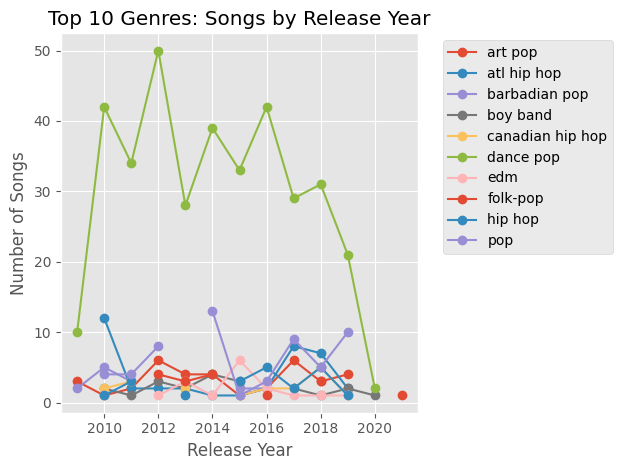

In [14]:
genre_year_counts = spotify_df.groupby(['top genre', 'year released']).size().unstack().fillna(0)
print("\n5. Songs per genre by release year:")
display(genre_year_counts.head())

# Visualization (Top 10 genres)
top_genres = spotify_df['top genre'].value_counts().nlargest(10).index
genre_trends = spotify_df[spotify_df['top genre'].isin(top_genres)] \
    .groupby(['year released', 'top genre']).size().unstack()

plt.figure(figsize=(12,6))
genre_trends.plot(kind='line', marker='o')
plt.title('Top 10 Genres: Songs by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot diagram showing the number of songs added by month & year


In [ ]:
spotify_df['added'] = pd.to_datetime(spotify_df['added'])
spotify_df['added_month'] = spotify_df['added'].dt.month_name()
spotify_df['added_year'] = spotify_df['added'].dt.year
print(spotify_df['added_month'])
print(spotify_df['added_year'])
display(spotify_df)

In [ ]:
spotify_df['month_year'] = spotify_df['added_month'] + spotify_df['added_year'].astype(str)
display(spotify_df)

In [49]:
# Diagram 1: Songs by month and year
if not spotify_df.empty:
    # Create proper month ordering
    month_order = ['january', 'february', 'march', 'april', 'may', 'june',
                   'july', 'august', 'september', 'october', 'november', 'december']
    # Assuming 'added_month' contains the month information
    spotify_df['added_month'] = spotify_df['added_month'].str.lower()  
    spotify_df['added_month'] = pd.Categorical(spotify_df['added_month'], categories=month_order, ordered=True)


In [51]:
 monthly_counts = spotify_df.groupby(['year released', 'added_month']).size().unstack() # Changed 'year' to 'year released'

C:\Users\keega\AppData\Local\Temp\ipykernel_17132\3091516889.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = spotify_df.groupby(['year released', 'added_month']).size().unstack() # Changed 'year' to 'year released'


<Figure size 1200x600 with 0 Axes>

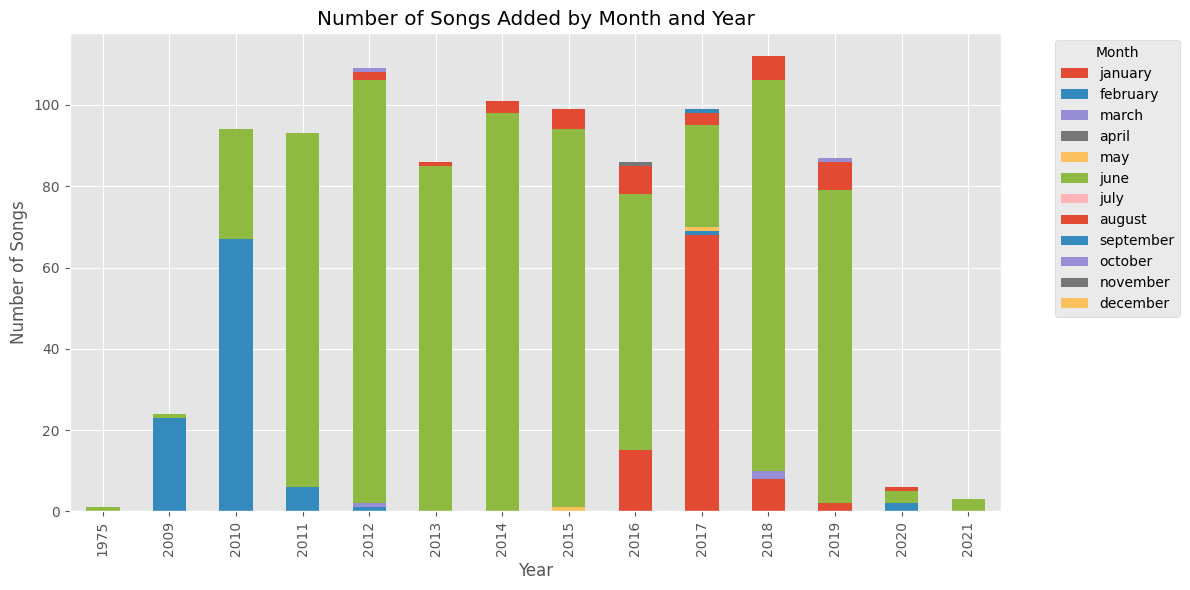

In [52]:
    plt.figure(figsize=(12, 6))
    monthly_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title('Number of Songs Added by Month and Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Songs')
    plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Line graph diagram showing the number of songs added by top genre for all years


In [59]:
songs_top_genre_year_counts = spotify_df.groupby(['added_year', 'top genre']).size().unstack().fillna(0)


C:\Users\keega\AppData\Local\Temp\ipykernel_17132\2151161165.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


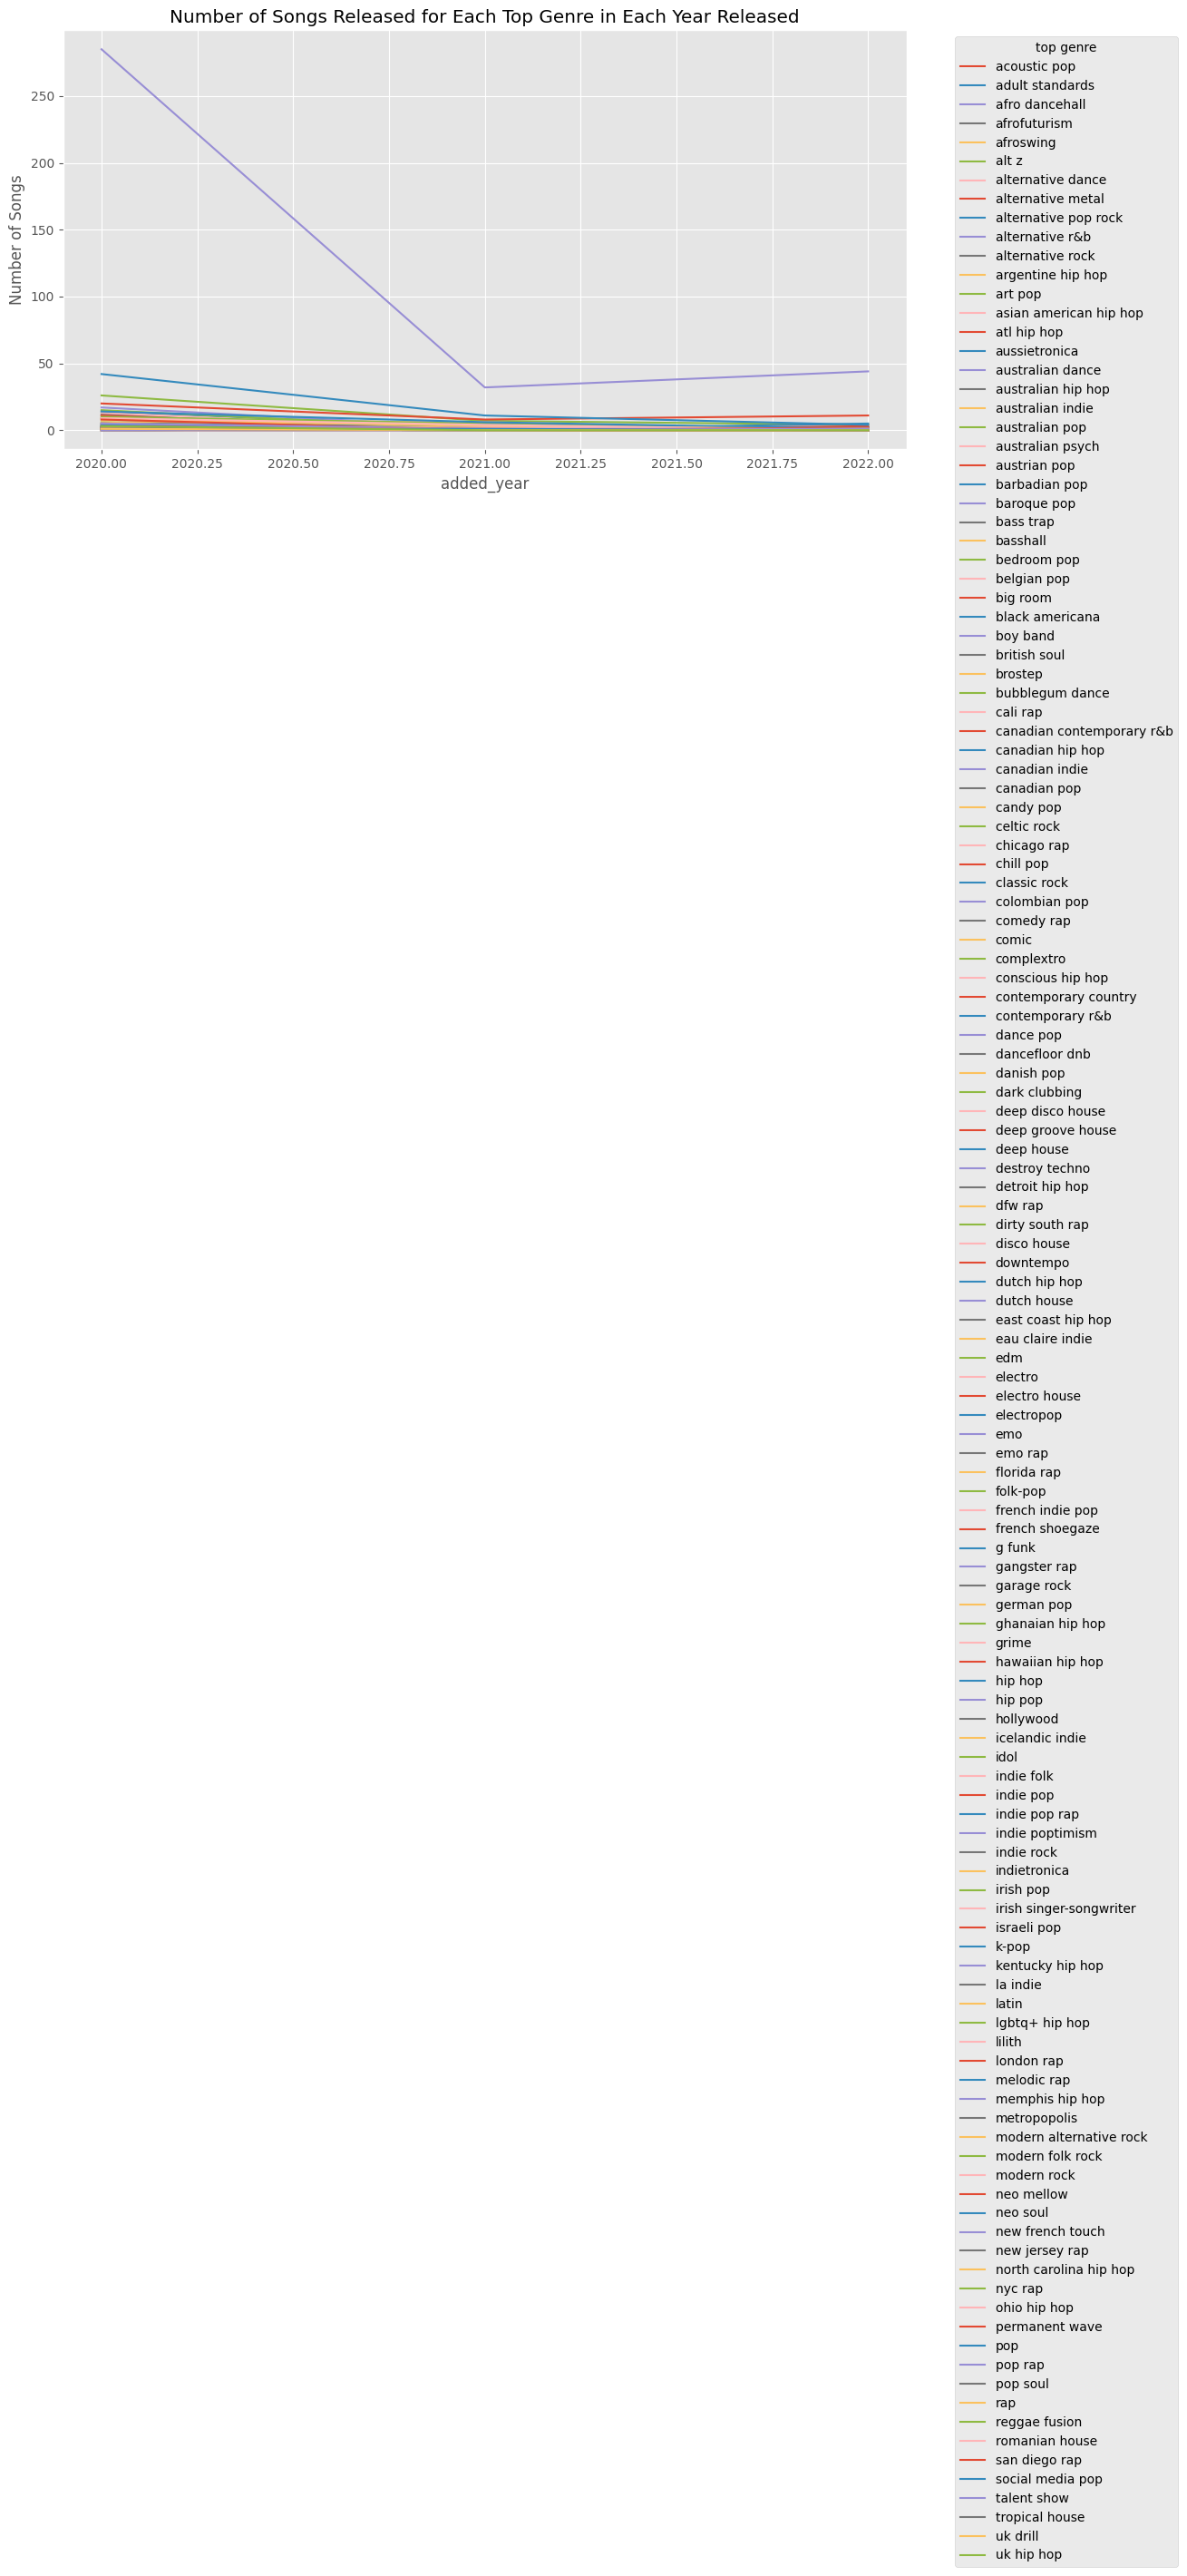

In [61]:
songs_top_genre_year_counts.plot(kind='line', figsize=(12,6))
plt.title('Number of Songs Released for Each Top Genre in Each Year Released')
plt.xlabel('added_year')
plt.ylabel('Number of Songs')
plt.legend(title='top genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()